##### store json as dataframe

In [2]:
import pandas as pd
import json
from datetime import datetime

In [3]:
with open('startupindia_posts_comments.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [3]:
data

{'posts': {'1mo8uly': {'id': '1mo8uly',
   'title': 'Built for small Indian sellers on WhatsApp, but global users showed up what now?',
   'author': 'Sad_Afternoon1811',
   'score': 51,
   'upvote_ratio': 0.89,
   'num_comments': 37,
   'created_utc': 1755005554.0,
   'url': 'https://i.redd.it/f00wreyfclif1.png',
   'selftext': 'I thought I knew exactly who I was building for.  \nSmall sellers in India, running their entire business on WhatsApp. That’s it.\n\nI check my early access list today… and most of them aren’t even from India.  \nThey’re from everywhere. US, Europe, Africa.  \nAnd it’s not just sellers I’ve got coaches, service providers, even someone who runs an online language school.\n\nThis thing I built for one small problem in one small corner of the world… apparently solves something bigger.  \nNow I’m sitting here thinking do I double down on the niche I know like the back of my hand?  \nOr do I let it grow into whatever it wants to be, even if that means going global a

In [4]:
def parse_timestamp(timestamp):
    """Handle both UNIX timestamps and ISO format strings"""
    if isinstance(timestamp, (int, float)):
        return datetime.utcfromtimestamp(timestamp)
    elif isinstance(timestamp, str):
        try:
            return pd.to_datetime(timestamp)
        except:
            return pd.NaT
    return pd.NaT

In [5]:
posts = []

for post_id, post_data in data['posts'].items():
    try:
        # Handle post data
        post_row = {
            'id': post_id,
            'type': "post",
            'title': post_data.get('title', ''),
            'author': post_data.get('author', '[deleted]'),
            'score': post_data.get('score', 0),
            'upvote_ratio': post_data.get('upvote_ratio', 1.0),
            'num_comments': post_data.get('num_comments', 0),
            'url': post_data.get('url', ''),
            'text': post_data.get('selftext', ''),
            'permalink': post_data.get('permalink', ''),
            'created': parse_timestamp(post_data.get('created_utc'))
            # 'fetched': parse_timestamp(post_data.get('fetched_at'))
        }
        posts.append(post_row)
        
        # Handle comments
        for comment in post_data.get('comments', []):
            comment_row = {
                'id': comment.get('id', ''),
                'type': "comment",
                'post_id': post_id,  # Critical for joining later
                'author': comment.get('author', '[deleted]'),
                'text': comment.get('body', ''),
                'score': comment.get('score', 0),
                'permalink': comment.get('permalink', ''),
                'created': parse_timestamp(comment.get('created_utc'))
                # 'fetched': parse_timestamp(post_data.get('fetched_at'))  # Same as parent post
            }
            posts.append(comment_row)
            
    except Exception as e:
        print(f"Error processing post {post_id}: {str(e)}")
        continue

# Create DataFrame
df = pd.DataFrame(posts)

# Convert empty strings to NaN
df.title = df.title.replace({pd.NA: " "})
# Convert deleted posts/comments to NaN
df = df.replace({'[deleted]': pd.NA})

# Replace new line markers
df.text.replace({'\n',' '})

print(f"Created DataFrame with {len(df)} rows")
print(df['type'].value_counts())

Created DataFrame with 18870 rows
type
comment    12939
post        5931
Name: count, dtype: int64


C:\Users\HOME\AppData\Local\Temp\ipykernel_16940\5669257.py:4: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.utcfromtimestamp(timestamp)
C:\Users\HOME\AppData\Local\Temp\ipykernel_16940\3293600356.py:50: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  df.text.replace({'\n',' '})


In [6]:
df.columns

Index(['id', 'type', 'title', 'author', 'score', 'upvote_ratio',
       'num_comments', 'url', 'text', 'permalink', 'created', 'post_id'],
      dtype='object')

In [6]:
df.head()

id     type                                              title  \
0  1mo8uly     post  Built for small Indian sellers on WhatsApp, bu...   
1  n8ahh9h  comment                                                      
2  n8abiif  comment                                                      
3  n8bj0q7  comment                                                      
4  1mofdft     post  Day 1 of taking over my dad's logistics busine...   

              author  score  upvote_ratio  num_comments  \
0  Sad_Afternoon1811     51          0.89          37.0   
1         LikedIt666     18           NaN           NaN   
2  Sad_Afternoon1811      5           NaN           NaN   
3        devcodesadi      4           NaN           NaN   
4  Goldium_logistics     28          0.91          27.0   

                                                 url  \
0                https://i.redd.it/f00wreyfclif1.png   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  https://www.reddit.com/r/indianstartups/commen...   

                                                text  \
0  I thought I knew exactly who I was building fo...   
1  Market demand is what you need to cater to. Th...   
2  For anyone curious what I’m talking about, her...   
3  don't build what you want,go for what market w...   
4  My dad has a logistics business (imports and e...   

                                           permalink             created  \
0  https://reddit.com/r/indianstartups/comments/1... 2025-08-12 13:32:34   
1  https://reddit.com/r/indianstartups/comments/1... 2025-08-12 14:05:39   
2  https://reddit.com/r/indianstartups/comments/1... 2025-08-12 13:33:08   
3  https://reddit.com/r/indianstartups/comments/1... 2025-08-12 17:13:04   
4  https://reddit.com/r/indianstartups/comments/1... 2025-08-12 17:39:04   

   post_id  
0      NaN  
1  1mo8uly  
2  1mo8uly  
3  1mo8uly  
4      NaN

##### text cleaning

In [6]:
df['text'] = df['title'] + ". " + df['text']

In [7]:
df['text'] = df['text'].dropna()

In [9]:
df['text'].isna().sum()

np.int64(177)

In [10]:
df.text.dtype

dtype('O')

In [8]:
df['text'] = df['text'].astype(str)

In [12]:
len(df.text)

18002

In [49]:
df.text

0        Why So Many Freshers Are Jumping Into Startups...
1         . 20s is a good age to experiment. Freshers h...
2         . As a 19 year old college founder of a start...
3         . Why do you care? Let them do whatever they ...
4        Launched a platform to meet people offline. 20...
                               ...                        
17317     . This guy is a cuck. The Anil Ambani of the ...
17318    Shit that didn’t happen. I mean not dismissing...
17319     . Haha.. they didn’t go down because the busi...
17320                   . Hindsight vision is always 20-20
17321               . Classic example of Hindsight Bias! 😭
Name: text, Length: 17322, dtype: object

In [13]:
import plotly.express as px

# 1. Convert DDMMYYYY string to datetime
df['date'] = pd.to_datetime(df['created'], format='%d%m%Y')

# 2. Extract year-month for grouping
df['year_month'] = df['date'].dt.to_period('M').astype(str)

# 3. Count posts per month
monthly_counts = df['year_month'].value_counts().sort_index().reset_index()
monthly_counts.columns = ['Month', 'Post Count']

# 4. Create histogram
fig = px.bar(
    monthly_counts,
    x='Month',
    y='Post Count',
    title='Monthly Post Volume',
    labels={'Post Count': 'Number of Posts'},
    color='Post Count',
    color_continuous_scale='thermal'
)

# 5. Customize layout
fig.update_layout(
    xaxis=dict(tickangle=45),
    plot_bgcolor='white',
    hovermode="x unified"
)

# 6. Add value labels
fig.update_traces(
    texttemplate='%{y}',
    textposition='outside'
)

fig.show()

##### counter

In [10]:
from collections import Counter
import nltk
import string

In [11]:
# Download required NLTK data
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HOME\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Data
text = pd.DataFrame(df, columns=['text'])

# 1. Preprocess text
def clean_text(text):
    # Lowercase and remove punctuation
    text = text.lower().translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(nltk.corpus.stopwords.words('english'))
    stop_words.update({'get','also','i’m','1','2','3','—','im','•','s','t','re'})
    return ' '.join([word for word in text.split() if word not in stop_words])

df['cleaned_text'] = df['text'].apply(clean_text)

In [13]:
df.cleaned_text

0        validating startup idea feel authentic place s...
1        idea looks fine hard part comes partnering uni...
2        think idea needs better fine people dont seem ...
3                         nsdc offers digital verification
4        doctors asset management company hey people to...
                               ...                        
18865                    guy cuck anil ambani bajaj family
18866    shit didn’t happen mean dismissing fact might ...
18867    haha didn’t go business bad went promoters dis...
18868                         hindsight vision always 2020
18869                     classic example hindsight bias 😭
Name: cleaned_text, Length: 18870, dtype: object

##### sentiment analysis - VADER

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [15]:
# Initialize VADER
sid = SentimentIntensityAnalyzer()

In [16]:
# 2. Get frequently mentioned words
all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words).most_common(50)
print("Top frequent words:")
for word, count in word_freq:
    if count>1000:
    	print(f"{word}: {count}")
# print(word_freq)
# getWordCloud(word_freq)

Top frequent words:
like: 4668
startup: 3882
people: 3364
would: 3352
business: 3340
india: 3073
work: 2826
one: 2790
need: 2704
looking: 2523
even: 2495
want: 2382
idea: 2343
time: 2335
know: 2302
company: 2229
product: 2194
good: 2140
help: 2139
something: 2100
building: 2071
startups: 2050
make: 1955
build: 1902
dont: 1899
money: 1820
ai: 1797
indian: 1677
working: 1647
think: 1625
start: 1625
experience: 1538
tech: 1521
app: 1493
us: 1486
founders: 1484
someone: 1478
years: 1428
first: 1424
market: 1423
it’s: 1350
many: 1307
dm: 1293
much: 1285
take: 1280
use: 1268
go: 1254
right: 1250
really: 1229
real: 1224


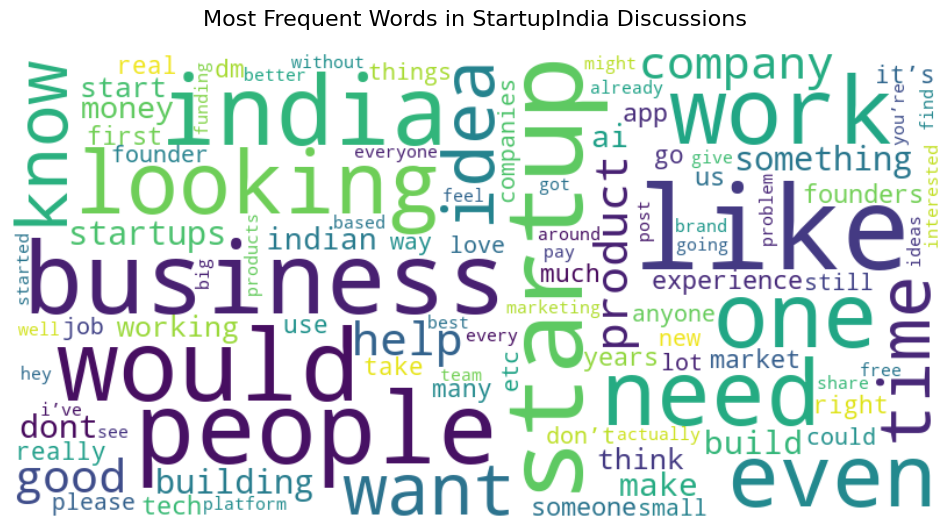

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 1. Prepare your text data (assuming you already have df['cleaned_text'])
all_words = ' '.join(df['cleaned_text']).split()

# 2. Generate word frequencies (alternative to Counter)
word_freq = Counter(all_words)

# 3. Create and customize word cloud
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    colormap='viridis',          # Try 'plasma', 'magma', 'inferno'
    max_words=100,               # Show top 100 words
    contour_width=1,
    contour_color='steelblue',
    stopwords=set(),             # We already filtered stopwords
    min_font_size=10,
    max_font_size=100
).generate_from_frequencies(word_freq)

# 4. Display with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in StartupIndia Discussions", pad=20, fontsize=16)
plt.show()

##### VADER

In [18]:
# 3. Get overall sentiment
def get_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']  # Overall sentiment (-1 to 1)

df['V_sentiment'] = df['text'].apply(get_sentiment)
print("\nOverall sentiment scores:")
print(df[['text', 'V_sentiment']])


Overall sentiment scores:
                                                    text  V_sentiment
0      validating a startup idea. Do you feel an auth...       0.9481
1       . The idea looks fine, but the hard part come...      -0.0516
2       . I think the idea needs to be better than fi...       0.7490
3                    . NSDC offers digital verification.       0.0000
4      Doctors asset management company. Hey people, ...       0.9111
...                                                  ...          ...
18865   . This guy is a cuck. The Anil Ambani of the ...       0.0000
18866  Shit that didn’t happen. I mean not dismissing...      -0.3182
18867   . Haha.. they didn’t go down because the busi...      -0.4926
18868                 . Hindsight vision is always 20-20       0.2500
18869             . Classic example of Hindsight Bias! 😭      -0.1759

[18870 rows x 2 columns]


In [19]:
def generate_wordcloud(text, city_name):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='rainbow',
        max_words=50,
        min_font_size=10,
    	max_font_size=100
    ).generate(text)
    
    plt.figure(figsize=(7, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {city_name.title()}", pad=20)
    plt.show()

In [20]:
# 4a. Get sentiment for cities
cities = {'bangalore':['bangalore','blr'],
          'delhi':['delhi'],
          'mumbai':['mumbai','bombay'],
          'hyderabad':['hyderabad'],
          'gurgaon':['gurgaon','gurugram'],
          'chennai':['chennai','madras'],
          'pune':['pune'],
          'noida':['noida'],
          'ahmedabad':['ahmedabad'],
          'kolkata':['kolkata','calcutta']
        }

##### City Sentiments

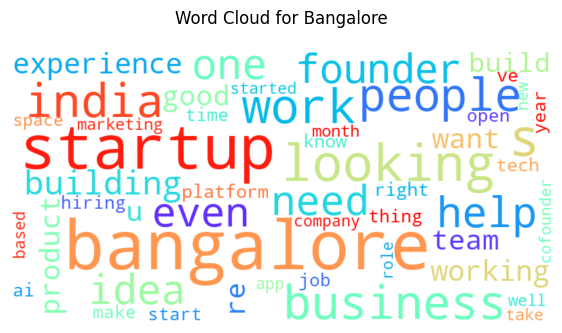

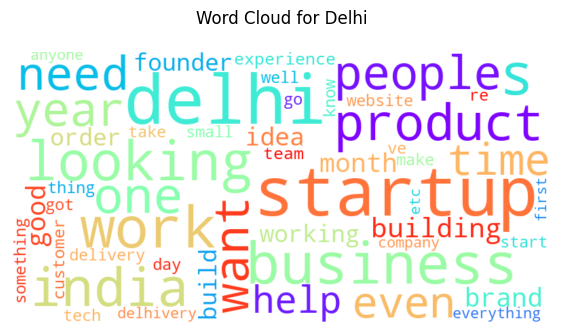

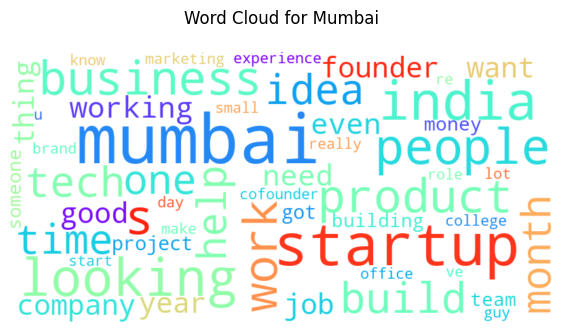

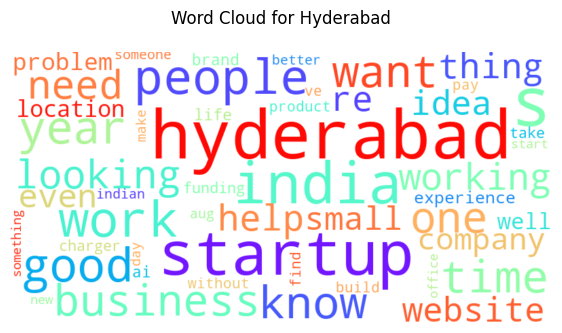

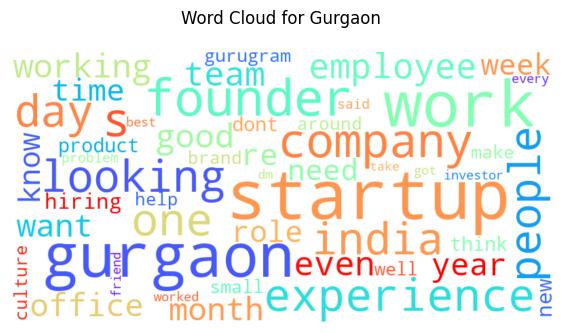

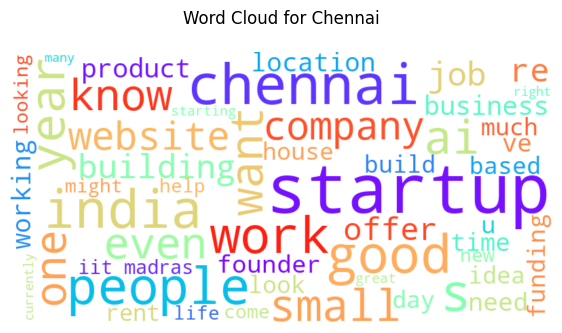

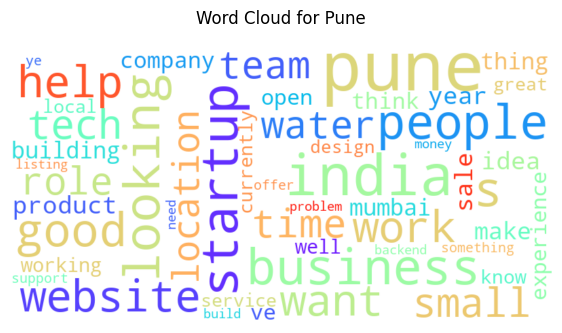

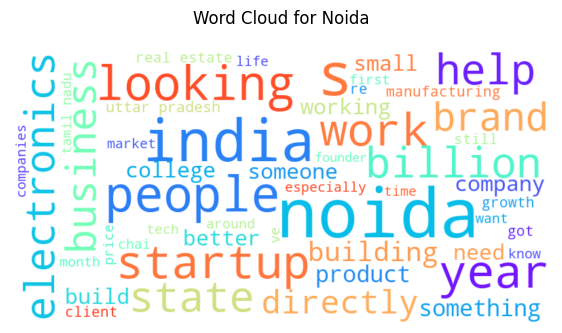

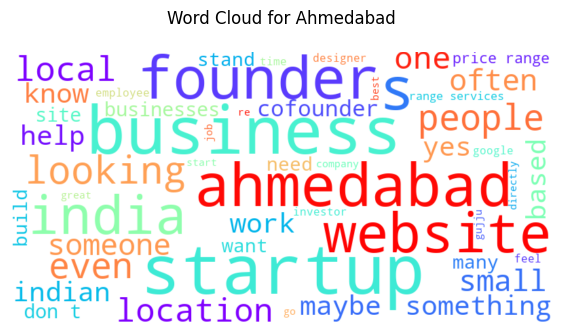

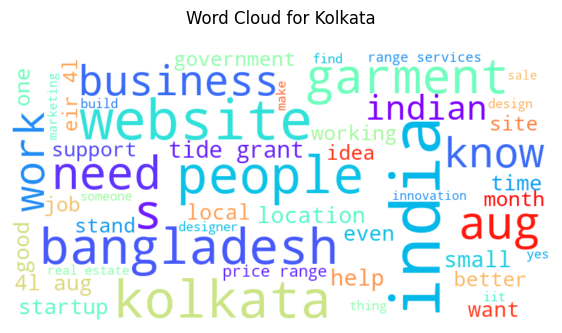

City Analysis Results:

City: Bangalore
Average Sentiment: 0.59
Occurrences: 265

Top 10 Frequent Words:
looking: 184
startup: 175
like: 136
business: 131
people: 114
work: 113
india: 108
building: 101
would: 99
even: 96

Example Sentences:
- offering custom printed cartons bangalore moq 500 hey everyone supply custom corrugated cartons bangalore flexible order quantities starting 500 cartons cartons designed strength durability branding making suitable ecommerce retail footwear manufacturing businesses offer ply 5 ply 7 ply cartons depending product weight shipping needs custom sizes printing branding logos product info inserts partitions diecut options available strong supply capability ontime delivery moq 500 cartons small midsized businesses access professional packaging work businesses across industries need sturdy reliable packaging shipping retail presentation whether it’s bulk shipping cartons branded ecommerce boxes deliver tailored solutions you’re business owner looking pack

In [22]:
city_sentiments = {}

for city, terms in cities.items():
    # Get all sentences containing any of the terms
    examples = [text for text in df['cleaned_text'] if any(term in text for term in terms)]
    
    if not examples:
        city_sentiments[city] = {
            'avg_sentiment': 0,
            'occurrences': 0,
            'top_words': [],
            'examples': []
        }
        continue
    
    # Calculate average sentiment
    sentiments = [get_sentiment(text) for text in examples]
    avg_sentiment = sum(sentiments)/len(sentiments)
    
    # Get all words from city-related texts (excluding the search terms and stopwords)
    all_words = []
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # stop_words.update({'get','also','i’m','1','2','3','—','im','•','s','t','re','ve','got'})
    
    for text in examples:
        # Clean and split text properly
        words = [word.lower().strip() for word in text.split() 
                if word.lower().strip() not in terms and 
                word.lower().strip() not in stop_words and
                len(word) > 2]  # Ignore short words
        all_words.extend(words)
    
    # Get top 10 frequent words
    word_freq = Counter(all_words).most_common(10)
    
    # Generate combined text for word cloud (using original text)
    combined_text = ' '.join(examples)
    
    # Store results
    city_sentiments[city] = {
        'avg_sentiment': avg_sentiment,
        'occurrences': len(examples),
        'top_words': word_freq,
        'examples': examples[:3]  # Store first 3 full examples
    }
    
    # Generate and save word cloud
    generate_wordcloud(combined_text, city)

# Print results
print("City Analysis Results:")
for city, data in city_sentiments.items():
    print(f"\nCity: {city.title()}")
    print(f"Average Sentiment: {data['avg_sentiment']:.2f}")
    print(f"Occurrences: {data['occurrences']}")
    
    if data['occurrences'] > 0:
        print("\nTop 10 Frequent Words:")
        for word, count in data['top_words']:
            print(f"{word}: {count}")
        
        print("\nExample Sentences:")
        for example in data['examples']:
            print(f"- {example}")  # Print full example
    else:
        print("No mentions found in dataset")

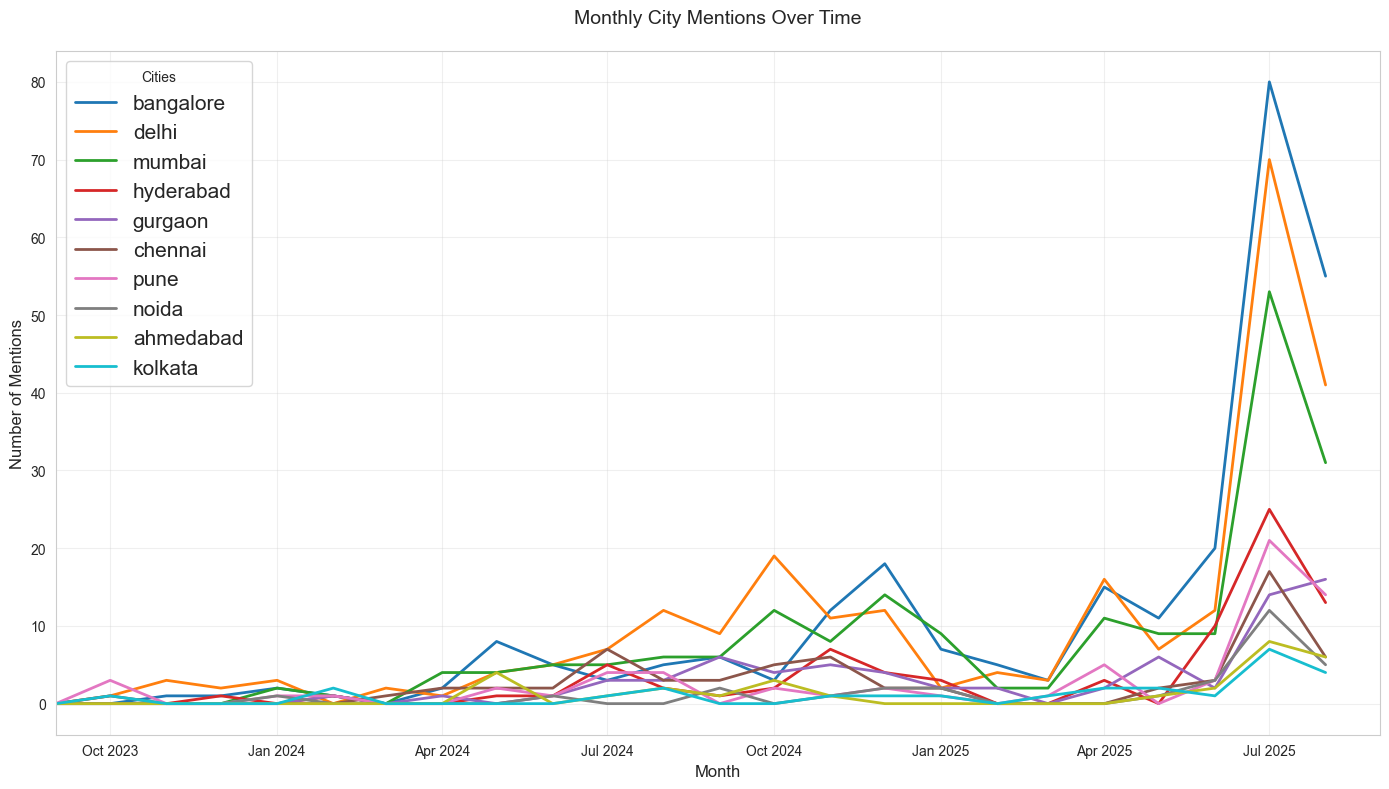

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

# 1. Convert 'created' to datetime and sort
# df['created'] = pd.to_datetime(df['created'])
# df = df.sort_values('created')

# 2. Create monthly time bins (ensures chronological order)
df['month'] = df['created'].dt.to_period('M').dt.to_timestamp()

# 3. Count city mentions per month
city_trends = []
for city, terms in cities.items():
    mask = df['text'].str.contains('|'.join(terms), case=False, na=False)
    monthly_counts = df[mask].groupby('month').size().rename(city)
    city_trends.append(monthly_counts)

# Combine into DataFrame and fill missing months with 0
mentions_df = pd.concat(city_trends, axis=1).fillna(0).asfreq('MS', fill_value=0)

# 4. Create line plot with proper date formatting
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Set a color palette (choose any from seaborn or matplotlib)
palette = sns.color_palette("tab10", len(mentions_df.columns))  # "husl", "viridis", "tab10", etc.
sns.set_palette(palette)

# Plot each city's trend line
for city in mentions_df.columns:
    plt.plot(mentions_df.index, 
             mentions_df[city], 
             label=city, 
             linewidth=2,
            #  marker='o', 
             markersize=5)

# Format x-axis dates
date_format = DateFormatter("%b %Y")
plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))  # Show max 12 date labels

# Customize plot
plt.title('Monthly City Mentions Over Time', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Mentions', fontsize=12)
plt.legend(title='Cities', loc='upper left', prop={'size':15})
plt.grid(True, alpha=0.3)
# plt.xticks(rotation=45)
plt.xlim(pd.Timestamp('2023-09-01'), pd.Timestamp('2025-08-31'))
plt.tight_layout()

plt.show()

In [24]:
import folium
from branca.colormap import LinearColormap
import pandas as pd

# 1. Define city coordinates (lat, lon)
city_coords = {
    'bangalore': (12.9729, 77.5775),
    'delhi': (28.7041, 77.1025),
    'mumbai': (18.9582, 72.8321),
    'hyderabad': (17.4065, 78.4772),
    'gurgaon': (28.4595, 77.0266),
    'chennai': (13.0827, 80.2707),
    'pune': (18.5246, 73.8786),
    'noida': (28.5355, 77.3910),
    'ahmedabad': (23.0225, 72.5714),
    'kolkata': (22.5744, 88.3629)
}

# 2. Prepare data for mapping
map_data = []
for city, data in city_sentiments.items():
    if city in city_coords:
        map_data.append({
            'city': city,
            'lat': city_coords[city][0],
            'lon': city_coords[city][1],
            'sentiment': data['avg_sentiment'],
            'mentions': data['occurrences'],
            'top_words': ', '.join([w[0] for w in data['top_words']][:5])
        })

df_map = pd.DataFrame(map_data)

# 3. Create color scale (-1 to 1 sentiment)
colormap = LinearColormap(
    colors=['red', 'yellow', 'green'],
    vmin=-1, vmax=1,
    caption='Average Sentiment'
)

# 4. Create base map centered on India
m = folium.Map(
    location=[20.5937, 78.9629],
    zoom_start=5,
    tiles='CartoDB positron'
)

# 5. Add city markers
for idx, row in df_map.iterrows():
    # Scale marker size by mentions (min 5, max 20)
    marker_size = max(5, min(20, row['mentions'] / 10))
    
    # Create popup content
    popup_content = f"""
    <b>{row['city'].title()}</b><br>
    Mentions: {row['mentions']}<br>
    Sentiment: {row['sentiment']:.2f}<br>
    Top words: {row['top_words']}
    """
    
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=marker_size,
        color=colormap(row['sentiment']),
        fill=True,
        fill_color=colormap(row['sentiment']),
        fill_opacity=0.7,
        popup=folium.Popup(popup_content, max_width=250)
    ).add_to(m)

# 6. Add legend and save
colormap.add_to(m)
m.save('india_sentiment_map.html')

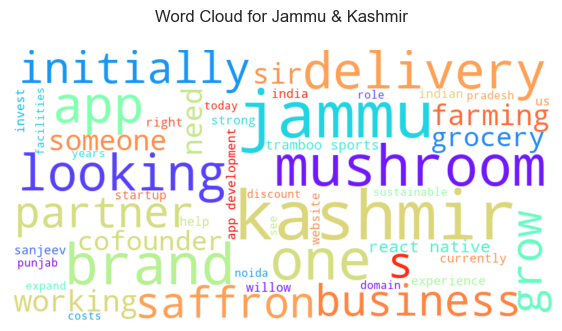

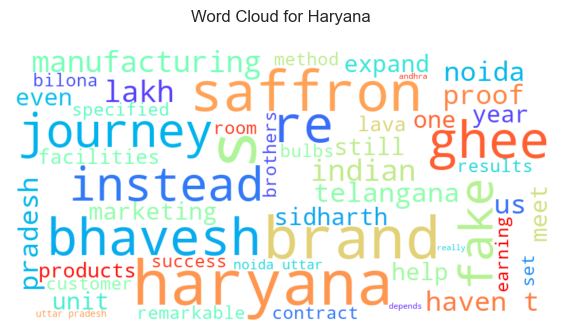

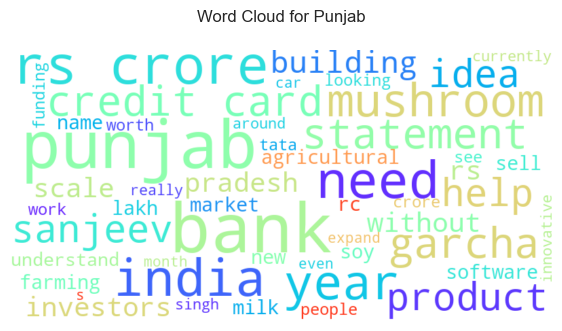

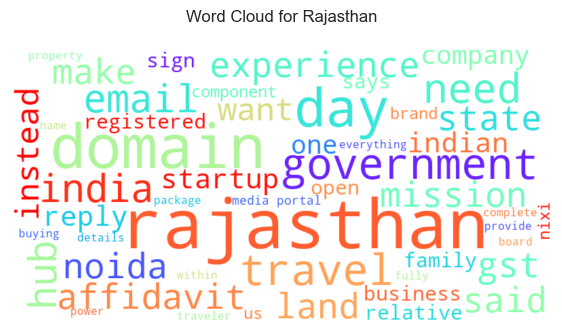

Term Analysis Results:

Word: JAMMU & KASHMIR
Average Sentiment: 0.56
Occurrences: 15

Top 10 Frequent Words:

Word: HARYANA
Average Sentiment: 0.59
Occurrences: 8

Top 10 Frequent Words:

Word: PUNJAB
Average Sentiment: 0.68
Occurrences: 12

Top 10 Frequent Words:

Word: RAJASTHAN
Average Sentiment: 0.61
Occurrences: 14

Top 10 Frequent Words:


In [26]:
# 4b. Get sentiment for words
words = {
		'jammu & kashmir': ['jammu','kashmir','j&k'],
        'haryana': ['haryana'],
        'punjab': ['punjab','punjabi'],
        'rajasthan': ['rajasthan']
        }  # Your words here
word_sentiments = {}

for word, terms in words.items():
    # Get all sentences containing any of the terms
    examples = [text for text in df['cleaned_text'] if any(term in text for term in terms)]
    
    # Calculate average sentiment
    sentiments = [get_sentiment(text) for text in examples]
    avg_sentiment = sum(sentiments)/len(sentiments)
    
    # Get all words from city-related texts (excluding the search terms)
    all_words = []
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # stop_words.update({'get','also','i’m','1','2','3','—','im','•','s','t','re'})
    for text in examples:
        words = [word for word in text.split() 
            if word not in terms and word not in stop_words]	# nltk.corpus.stopwords.words('english')
        all_words.extend(words)
    
    # Get top 10 frequent words
    word_freq = Counter(all_words).most_common(10)
    
    # Generate combined text for word cloud
    combined_text = ' '.join(examples)
    
    # Store results
    word_sentiments[word] = {
        'avg_sentiment': avg_sentiment,
        'occurrences': len(examples),
        'top_words': word_freq,
        'examples': examples[:3]  # Store first 3 examples
    }
    generate_wordcloud(combined_text, word)


# Print results
print("Term Analysis Results:")
for word, data in word_sentiments.items():
    print(f"\nWord: {word.upper()}")
    print(f"Average Sentiment: {data['avg_sentiment']:.2f}")
    print(f"Occurrences: {data['occurrences']}")
    print("\nTop 10 Frequent Words:")
    for word, count in data['top_words']:
        if count>100:
        	print(f"{word}: {count}")
    # print("Example sentences:")
    # for sent in data['examples'][:2]:  # Show first 2 examples
        # print(f"- {sent}")

##### Topic

In [32]:
from bertopic import BERTopic
import pandas as pd

# 1. Load your cleaned data
# Assuming df has a 'cleaned_text' column
documents = df['cleaned_text'].tolist()

# 2. Create and fit the simplest BERTopic model
topic_model = BERTopic(language="english", verbose=True)
topics, probabilities = topic_model.fit_transform(documents)

# 3. View the results
topic_info = topic_model.get_topic_info()
print(topic_info.head(10))

# 4. Visualize topics
topic_model.visualize_topics().show()

2025-08-08 22:24:50,377 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/533 [00:00<?, ?it/s]

2025-08-08 22:29:29,568 - BERTopic - Embedding - Completed ✓
2025-08-08 22:29:29,571 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-08-08 22:30:25,948 - BERTopic - Dimensionality - Completed ✓
2025-08-08 22:30:25,951 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-08-08 22:30:51,810 - BERTopic - Cluster - Completed ✓
2025-08-08 22:30:51,828 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-08-08 22:30:54,454 - BERTopic - Representation - Completed ✓


   Topic  Count                               Name  \
0     -1   8292    -1_startup_business_like_people   
1      0    369                  0_hai_bhai_ka_bhi   
2      1    317           1_ai_agents_tools_models   
3      2    229   2_gst_ca_registration_compliance   
4      3    213         3_food_drink_grams_protein   
5      4    179      4_nan_pennywise_ohio_networth   
6      5    162     5_employees_toxic_culture_work   
7      6    160  6_medical_doctors_health_pharmacy   
8      7    136  7_payment_payments_stripe_gateway   
9      8    133      8_clothing_brand_wear_fashion   

                                      Representation  \
0  [startup, business, like, people, dont, india,...   
1    [hai, bhai, ka, bhi, ki, se, kya, ke, ye, nahi]   
2  [ai, agents, tools, models, agentic, using, au...   
3  [gst, ca, registration, compliance, register, ...   
4  [food, drink, grams, protein, fat, taste, bran...   
5  [nan, pennywise, ohio, networth, desi, oil, qu...   
6  [employees

In [ ]:
# 1. Get topic info and filter for topics 1-7 and 11
selected_topics = [1,2,3,5,6,7,8,10,12]
topic_info = topic_model.get_topic_info()
filtered_topics = topic_info[topic_info['Topic'].isin(selected_topics)]


# 3. Generate heatmap with annotations
fig = topic_model.visualize_heatmap(
    topics=filtered_topics['Topic'].tolist()
)

# 4. Enhance the visualization
fig.update_layout(
    title="Similarity Between Selected Topics (1-7 & 11)",
    xaxis_title="Topics",
    yaxis_title="Topics",
    xaxis=dict(tickangle=45),
    margin=dict(l=100, r=100, t=100, b=100)
)

fig.show()

In [35]:
# 1. First get topics_over_time for ALL topics
topics_over_time = topic_model.topics_over_time(
    docs=documents,
    topics=topics,
    timestamps=df['created'],
    nr_bins=50
)

# 2. Filter for only topics 1-7 and 11
selected_topics = [1,2,3,5,6,7,8,10,12]
filtered_topics = topics_over_time[topics_over_time['Topic'].isin(selected_topics)]

# 3. Visualize just these topics
fig = topic_model.visualize_topics_over_time(
    filtered_topics,
    topics=selected_topics,  # Explicitly specify which topics to show
    width=1000,
    height=600,
    title="Trends for Topics 1-7 and 11"
)

# 4. Customize the visualization
fig.update_layout(
    yaxis_title="Topic Frequency",
    xaxis_title="Timeline",
    legend_title="Topics",
    hovermode="x unified"
)

# 5. Show and save
fig.show()
# fig.write_html("selected_topics_over_time.html")

37it [00:07,  5.08it/s]


##### City Topics

In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
# import nltk

# Download stopwords if not already available
# nltk.download('stopwords')

# 1. Load your cleaned data
# Assuming df has 'text' (original) and 'cleaned_text' (preprocessed) columns
documents = df['cleaned_text'].tolist()

# 2. Initialize LDA components
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stopwords.words('english'))
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)  # Adjust n_components as needed

# 3. Process and analyze for each city
city_topics = {}

for city, terms in cities.items():
    # Filter documents for the city
    mask = df['text'].str.contains('|'.join(terms), case=False, na=False)
    city_docs = df[mask]['cleaned_text'].tolist()
    
    if len(city_docs) > 0:  # Only process if documents exist
        # Vectorize and fit LDA
        doc_term_matrix = vectorizer.fit_transform(city_docs)
        lda_model.fit(doc_term_matrix)
        
        # Get top words for each topic
        feature_names = vectorizer.get_feature_names_out()
        topics = []
        for topic_idx, topic in enumerate(lda_model.components_):
            top_words = [feature_names[i] for i in topic.argsort()[-10:][::-1]]  # Top 10 words
            topics.append((topic_idx, top_words))
        
        # Store results
        city_topics[city] = {
            'topics': topics[:3],  # Get top 3 topics
            'doc_count': len(city_docs)
        }

# 4. Print results
for city, data in city_topics.items():
    print(f"\n--- Top 3 Topics for {city.upper()} ({data['doc_count']} documents) ---")
    for topic in data['topics']:
        print(f"Topic {topic[0]}: {', '.join(topic[1])}")


--- Top 3 Topics for BANGALORE (264 documents) ---
Topic 0: looking, bangalore, business, help, building, experience, cofounder, would, tech, startup
Topic 1: ai, one, like, hiring, even, people, work, india, bangalore, process
Topic 2: bangalore, startup, india, startups, us, people, looking, based, work, like

--- Top 3 Topics for DELHI (247 documents) ---
Topic 0: delhi, looking, tech, cofounder, need, data, business, building, people, someone
Topic 1: india, like, delhi, aug, startup, would, 4l, 20, business, grant
Topic 2: delhi, shiprocket, even, shipping, delhivery, delivery, india, service, small, companies

--- Top 3 Topics for MUMBAI (194 documents) ---
Topic 0: looking, mumbai, company, tech, like, startup, startups, india, time, work
Topic 1: aug, 20, grant, 4l, iit, mumbai, india, 7l, really, tide
Topic 2: mumbai, job, india, indian, work, office, bangladesh, looking, business, real

--- Top 3 Topics for HYDERABAD (79 documents) ---
Topic 0: startup, hyderabad, like, peop